# Une régression logistique sur le jeu de données Titanic

## Importer les librairies

Vous aurez besoin de pandas, matplotlib, seaborn (et numpy ?)

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

## Importer les données et commencer à explorer le dataset

#### Le jeu de données titanic.csv est chargé dans votre environnement.

In [160]:
data = pd.read_csv('Data/titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Utiliser les méthodes des DataFrames pour avoir un premier aperçu de vos données : info(), describe() et count()

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [162]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [163]:
data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

## Gestion des valeurs manquantes

#### Utiliser la fonction heatmap de seaborn pour visualiser les valeurs manquantes sur un graphique et identifier les valeurs manquantes

In [164]:
print(data.isna().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


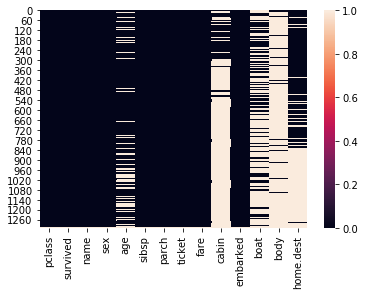

In [165]:
hm = sns.heatmap(data.isna())

#### Supprimer les colonnes et/ou lignes qui vous paraissent inutilisables

In [166]:
data.drop(['cabin', 'body', 'boat', 'home.dest'], axis = 1, inplace = True)

In [167]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [168]:
data.dropna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,C
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C


#### Focus sur l'âge : peu de valeurs manquantes, on peut donc faire un peu d'imputation

On pourrait imputer tout simplement l'âge moyen pour toutes les valeurs manquantes. C'est une solution viable et assez simple. Mais on peut faire mieux en s'intéressant par exemple à l'âge moyen au sein de certain groupes...  

Regardez en utilisant les graphiques adéquats la répartition de l'âge par classe et par sexe.

Conclure sur quelle imputation serait pertinente. 

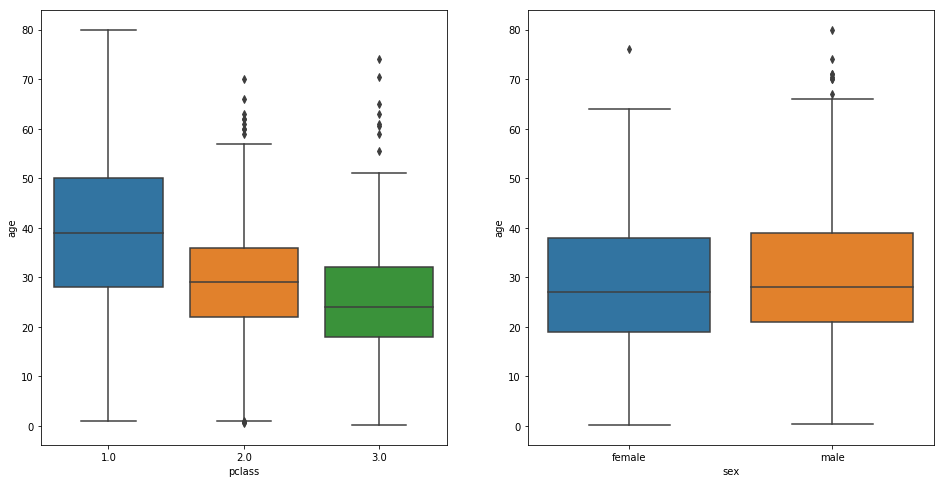

In [169]:
fig =plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(x = 'pclass', y = 'age', data = data, ax = ax1 )
sns.boxplot(x = 'sex', y = 'age', data = data, ax = ax2 )

Faire l'imputation choisie pour les âges manquants.  
_Indication : une solution est de créer une fonction qui renvoie l'âge voulu selon les cas puis de l'appliquer sur les lignes avec la méthode apply_

In [170]:
mean_age = data.groupby(['pclass', 'sex']).mean()[['age']]
mean_age

age
pclass sex              
1.0    female  37.037594
       male    41.029250
2.0    female  27.499191
       male    30.815401
3.0    female  22.185307
       male    25.962273

In [171]:
data['age'] = data['age'].fillna(data.groupby(['pclass', 'sex'])['age'].transform('mean'))
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


Réafficher la visualisation des données manquantes avec heatmap. Que constatez-vous ? 

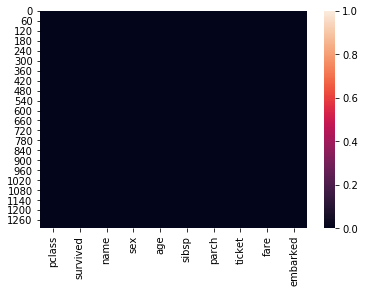

In [172]:
heatmap2 = sns.heatmap(data.isna())

Vérifier où sont les données encore manquantes avec la méthode DataFrame.info() par exemple puis supprimer les lignes concernées avec la méthode adaptée.  
Vérifier à nouveau ce qu'il en est des valeurs manquantes avec DataFrame.count() pour changer

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
pclass      1309 non-null float64
survived    1309 non-null float64
name        1309 non-null object
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null float64
parch       1309 non-null float64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


In [174]:
data.dropna(axis = 0, inplace = True)

In [175]:
data.count()

pclass      1306
survived    1306
name        1306
sex         1306
age         1306
sibsp       1306
parch       1306
ticket      1306
fare        1306
embarked    1306
dtype: int64

## Analyse de données : visualisation

Avec seaborn, afficher une série de graphiques pour avoir une idée de la répartition des variables indépendantes et visualiser les effets possibles des différentes variables indépendantes sur la survie ou non.  
_Indication : vous pourrez regarder par exemple la distribution des âges, des tarifs et comparer sexe vs survie, classe vs survie,sibsp vs survie en utilisant les visualisations que vous souhaitez_

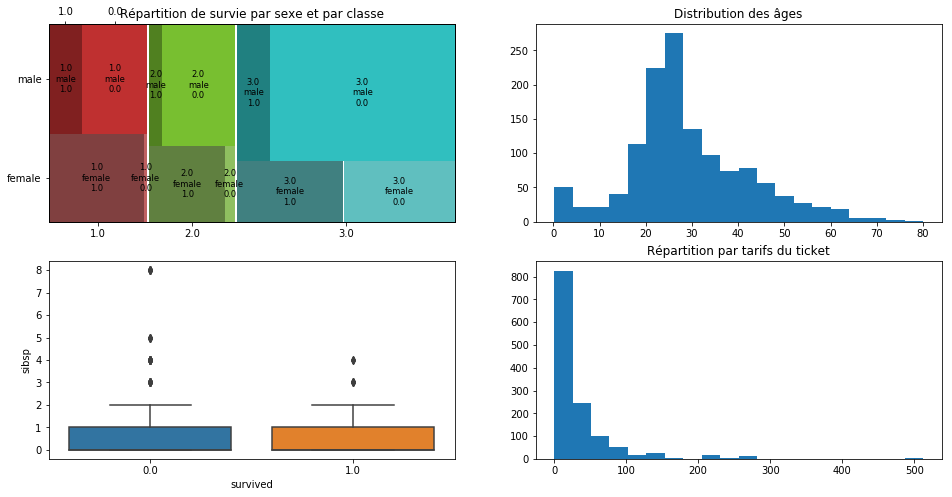

In [176]:
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

mosaic(data, ['pclass', 'sex', 'survived'], ax = ax1,
       title = 'Répartition de survie par sexe et par classe')

ax2.hist(data.age, bins = 20)
ax2.set_title('Distribution des âges')

sns.boxplot(x = 'survived', y = 'sibsp', data = data, ax = ax3)

ax4.hist(data.fare, bins = 20)
ax4.set_title('Répartition par tarifs du ticket')

plt.show()

## Gestion des variables catégoriques

#### Identifier les variables catégoriques et les transformer de sorte à pouvoir les utiliser ensuite dans votre modèle

In [177]:
dummies = pd.get_dummies(data['pclass'])
data = pd.concat([data, dummies], axis = 1)
data.drop(['pclass', 3.0], inplace = True, axis = 1)

In [178]:
dummies = pd.get_dummies(data['sex'])
data = pd.concat([data, dummies], axis = 1)
data.drop(['sex', 'male'], inplace = True, axis = 1)

In [179]:
dummies = pd.get_dummies(data['embarked'])
data = pd.concat([data, dummies], axis = 1)
data.drop(['embarked', 'C'], inplace = True, axis = 1)

In [180]:
data.head()

,survived,name,age,sibsp,parch,ticket,fare,1.0,2.0,female,Q,S
0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,1,0,1,0,1
1,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,1,0,0,0,1
2,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,1,0,1,0,1
3,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,1,0,0,0,1
4,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,1,0,1,0,1


## Création d'un train set et test set

In [182]:
X = data.drop(['survived', 'ticket', 'name'], axis = 1)
y = data['survived']

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [208]:
x_train.isna().sum()

age       0
sibsp     0
parch     0
fare      0
1.0       0
2.0       0
female    0
Q         0
S         0
dtype: int64

## Création du modèle, entraînement et prédictions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


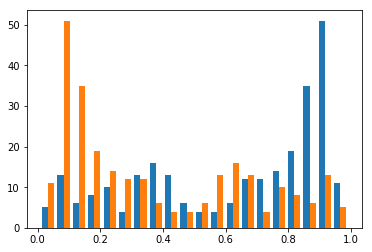

In [209]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()
reg_log.fit(x_train, y_train)

# prédiction proba
prob_pred = reg_log.predict_proba(x_test)

# Prédiction
y_pred = reg_log.predict(x_test)
plt.hist(prob_pred, bins = 20);


## Évaluation du modèle

Vous pourrez utiliser la fonction classification_report, la matrice de confusion ou tout autre méthode d'évaluation du modèle.

In [210]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7748091603053435


In [191]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns = ['Prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm

,Prédit 0.0,Prédit 1.0
vrai 0.0,177,32
vrai 1.0,41,77


In [211]:
X.head()

,age,sibsp,parch,fare,1.0,2.0,female,Q,S
0,29.0000,0.0,0.0,211.3375,1,0,1,0,1
1,0.9167,1.0,2.0,151.5500,1,0,0,0,1
2,2.0000,1.0,2.0,151.5500,1,0,1,0,1
3,30.0000,1.0,2.0,151.5500,1,0,0,0,1
4,25.0000,1.0,2.0,151.5500,1,0,1,0,1


In [220]:
# Faire une prediction
reg_log.predict([[177, 1.0, 0.0, 50, 2, 0, 0, 0, 0]])

array([0.])